#  PCA and LDA
PCA and LDA are used not to determine the outcome of the modeling exercise, but rather look a the number of potential variables discriminating between variables.

In [37]:
#read in packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import RobustScaler, StandardScaler

from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [40]:
data_in = pd.read_csv('data/after_woe.csv')
import copy
data = copy.deepcopy(data_in);
data = data.sample(frac=0.1, random_state=9)

## Dividing the dataset into a target and training set
Dividing the variables as neeed.

In [41]:
target = data.PERFORMING
all_data = data.drop(data[{'Unnamed: 0', 'index', 'purpose', 'home_ownership',
                                 'member_id', 'grade', 'sub_grade', 'FICO', 'installment'}], axis=1)
features = data.drop(data[{'Unnamed: 0', 'index', 'purpose', 'home_ownership',
                                 'member_id', 'grade', 'sub_grade', 'FICO', 'PERFORMING', 'installment'}], axis=1)

print("Target dimensions :", target.shape)
print("Feature dimensions :", features.shape)
print("All data dimensions :", all_data.shape)

Target dimensions : (237634,)
Feature dimensions : (237634, 19)
All data dimensions : (237634, 20)


In [42]:
all_data=all_data[['PERFORMING', 'CREDIT_HISTORY', 'Maturity', 'annual_inc','delinq_2yrs',
                   'dti', 'emp_length_int', 'inq_last_6mths', 'int_rate', 'loan_amnt', 
                   'mths_since_last_delinq','mths_since_last_record','open_acc',
                   'pub_rec', 'pub_rec_bankruptcies', 'revol_bal', 'revol_util', 
                   'tax_liens', 'total_acc', 'vintage']]
all_data_correlation=all_data.corr()

## Relationship between the observations
Looking at the variables in a clustermap 

Text(0.5, 0.98, 'Clustermap all observations')

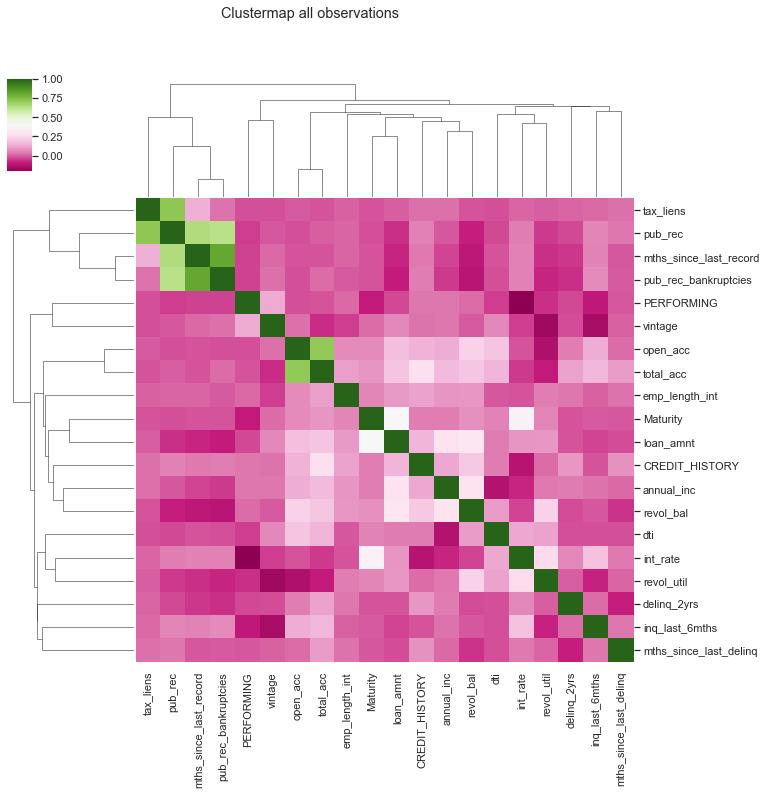

In [43]:
g1 = sns.clustermap(all_data_correlation, method='average', metric='euclidean',
                    row_cluster=True, col_cluster=True, cmap="PiYG")
g1.fig.suptitle('Clustermap all observations')


## Splitting the data
The data set is split between target and features, scaling using robust scaler as standard scaler yields the odd result that 95% of the variation can be explained by a sole variable.

In [51]:
target_y = target.values
features_X = features.values

X_train, X_test, y_train, y_test = train_test_split(features_X, target_y, 
                                                     test_size=0.4, random_state = 4)

rs = StandardScaler()  
X_train = rs.fit_transform(X_train)  
X_test = rs.transform(X_test)

# PCA an analysis
Running the analysis

In [60]:
names=['Performing','Defaulted']

pca = PCA(n_components=19)
pca_fit = pca.fit(X_train)
pca_fit_transform = pca.fit_transform(X_train)

In [53]:
print(pca_fit.components_)

[[-2.00623116e-01 -9.82589682e-02  1.71977609e-02  4.91959172e-04
  -1.28282161e-01 -6.90364637e-02 -5.33207447e-02 -6.43277388e-02
  -5.32857871e-02  4.18375100e-02  9.84431509e-03  4.89824308e-01
   4.74946996e-01  2.86938919e-01 -1.55682805e-01  5.18080966e-01
  -2.15137798e-01 -1.51527293e-01 -8.47532075e-02]
 [ 3.14399785e-01  2.07813569e-01  7.91310646e-02  7.40376502e-03
   2.43114258e-01  1.38887469e-01  1.61810636e-01  2.95965383e-01
   6.47175445e-02  1.32663300e-01  5.86236447e-02  1.92798860e-01
   1.86834777e-01  1.53995450e-01  4.32505525e-01  2.33909310e-01
   2.85657267e-01  4.63363666e-01  1.94643746e-02]
 [ 2.55935420e-01  4.46925123e-01  5.48939785e-01 -9.88581800e-02
  -2.13781321e-02  1.03000399e-01  2.55838244e-02 -1.34573257e-01
  -4.34666660e-02 -1.14135262e-02 -4.07510975e-02  2.24336878e-02
   4.03840463e-03  6.38748189e-02 -2.73072198e-01  5.13971538e-02
   9.79264626e-02 -2.77796252e-01  4.70708278e-01]
 [ 2.30926881e-01 -8.16071908e-02 -3.58684652e-01  1.68

In [54]:
print(pca.explained_variance_)

[2.64282127 2.37615699 1.65091259 1.41651067 1.25898924 1.17618389
 1.14830379 1.08254735 1.02632282 0.92408647 0.84247136 0.78090907
 0.64073542 0.59096859 0.5326102  0.43032383 0.25526393 0.17961224
 0.04440354]


In [55]:
X_pca = pca_fit.transform(X_train)
print("original shape:   ", X_train.shape)
print("transformed shape:", X_pca.shape)

original shape:    (142580, 19)
transformed shape: (142580, 19)


In [61]:
variance = pca_fit.explained_variance_ratio_ 
var=np.cumsum(np.round(variance, decimals=3)*100)
print(var)

[13.9 26.4 35.1 42.6 49.2 55.4 61.4 67.1 72.5 77.4 81.8 85.9 89.3 92.4
 95.2 97.5 98.8 99.7 99.9]


## PCA results
The results suggest that between 12 and 15 factors offer high explanatory value.

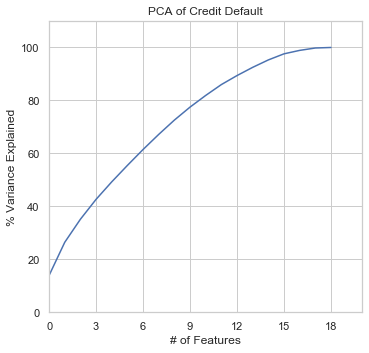

In [62]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA of Credit Default')
plt.xticks(range(0, 20, 3))
plt.yticks(range(0, 110, 20))
plt.ylim(0,110)
plt.xlim(0,20)
plt.plot(var)

## Variance inflation factor
Looking at the variance inflation factor quantifies the severity of multicollinearity in an ordinary least squares regression analysis. Since credit models tend to be overspecified, it is worth exploring.

In [63]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train, i) for i in range(X_train.shape[1])]
vif["features"] = features.columns
vif


,VIF Factor,features
0,1.405436,loan_amnt
1,1.387535,Maturity
2,1.414108,int_rate
3,1.099303,vintage
4,1.192180,annual_inc
5,1.128496,dti
6,1.037523,emp_length_int
7,1.185595,CREDIT_HISTORY
8,1.062314,delinq_2yrs
9,1.130261,inq_last_6mths


# Linear Discriminant Analysis
Linear discriminant analysis (LDA)is to find a linear combination of features that characterizes or separates two or more classes of objects or events: here default and non-default. The resulting combination may be used as a linear classifier, or, more commonly, for dimensionality reduction before later classification.

In [64]:
rs = RobustScaler()  
X_train_rs = rs.fit_transform(X_train)  
X_test_rs = rs.transform(X_test)

lda = LinearDiscriminantAnalysis(n_components=100)
X_r2 = lda.fit(X_train_rs, y_train).transform(X_train_rs)
print(lda.explained_variance_ratio_)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(19, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


[1.]


## Results of the assessment

In [65]:
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train_rs, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test_rs, y_test)))

Accuracy of LDA classifier on training set: 0.86
Accuracy of LDA classifier on test set: 0.87


Text(0.5, 1.0, 'ROC Curve')

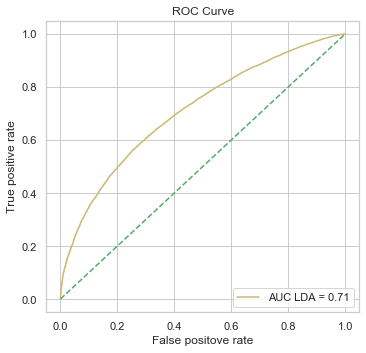

In [66]:
probs=lda.predict_proba(X_test_rs)

false_positive_rate, recall, thresholds = roc_curve(y_test, probs[:,1])
roc_auc=roc_auc_score(y_test, probs[:,1])

plt.plot(false_positive_rate, recall, 'y', label = 'AUC %s = %0.2f' % ('LDA', roc_auc))
plt.plot([0,1], [0,1], 'g--')
plt.legend(loc = 'lower right')
plt.ylabel('True positive rate')
plt.xlabel('False positove rate')
plt.title('ROC Curve')

The ROC of the LDA is around 0.71.

Accuracy0.8658972794411598


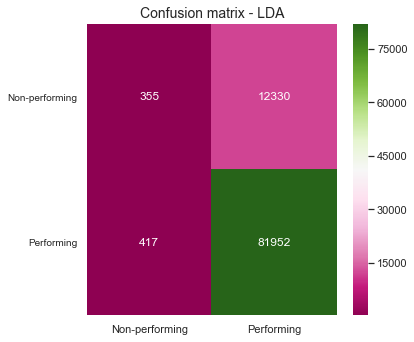

In [67]:
y_pred=lda.predict(X_test_rs)

cm = confusion_matrix(y_test, y_pred)
cm1 = sns.heatmap(cm, fmt='d', annot=True, xticklabels=['Non-performing', 'Performing'],
                  yticklabels=['Non-performing', 'Performing'], cmap="PiYG")
cm1.set_yticklabels(cm1.get_yticklabels(), rotation=0, fontsize=10)
cm1.set_title("Confusion matrix - LDA", fontsize=14)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

In [68]:
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.03      0.46      0.05       772
           1       0.99      0.87      0.93     94282

    accuracy                           0.87     95054
   macro avg       0.51      0.66      0.49     95054
weighted avg       0.99      0.87      0.92     95054



# Removing multicolleniarity
An attempt to control for multicolleniarity by removing  collinear features in a dataframe with a correlation coefficient greater than the threshold. Removing collinear features can help a model to generalize and improves the interpretability of the model.

In [69]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.

    Inputs: 
        threshold: any features with correlations greater than this value are removed

    Output: 
        dataframe that contains only the non-highly-collinear features
    '''

    # Dont want to remove correlations between loss
    y = x['PERFORMING']
    x = x.drop(columns=['PERFORMING'])

    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns=drops)

    # Add the score back in to the data
    x['PERFORMING'] = y

    return x

In [70]:
data_set_nocoll60 = remove_collinear_features(all_data, 0.6)
print(features_X.shape)
print(data_set_nocoll60.shape)

(237634, 19)
(237634, 16)


## Sequentially removing columns
### Threshold 60%

In [71]:
print("Removed columns :", list(set(all_data.columns.to_list()
                                    ).difference(data_set_nocoll60.columns.to_list())))

Removed columns : ['tax_liens', 'pub_rec', 'pub_rec_bankruptcies', 'total_acc']


Rerunning the models

In [72]:
target_60 = data_set_nocoll60['PERFORMING']
features_60 = data_set_nocoll60.drop(data_set_nocoll60[{'PERFORMING'}], axis=1)

In [75]:
target_y  = target_60.values
features_X_60 = features_60.values

In [76]:
X_60_train, X_60_test, y_60_train, y_60_test = train_test_split(features_X_60, target_y, 
                                                     test_size=0.4, random_state = 42)

rs = RobustScaler()  
X_60_train_rs = rs.fit_transform(X_60_train)  
X_60_test_rs = rs.transform(X_60_test)

lda = LinearDiscriminantAnalysis(n_components=100)
X_60_r2 = lda.fit(X_60_train_rs, y_60_train).transform(X_60_train_rs)
print(lda.explained_variance_ratio_)

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_60_train, i) for i in range(X_60_train.shape[1])]
vif["features"] = features.columns
print(vif)

print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_60_train_rs, y_60_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_60_test_rs, y_60_test)))

probs=lda.predict_proba(X_60_test_rs)
false_positive_rate, recall, thresholds = roc_curve(y_60_test, probs[:,1])
roc_auc=roc_auc_score(y_60_test, probs[:,1])

plt.plot(false_positive_rate, recall, 'y', label = 'AUC %s = %0.2f' % ('LDA', roc_auc))
plt.plot([0,1], [0,1], 'g--')
plt.legend(loc = 'lower right')
plt.ylabel('True positive rate')
plt.xlabel('False positove rate')
plt.title('ROC Curve - correlations capped at 0.60')
plt.show()

y_60_pred=lda.predict(X_60_test_rs)

cm = confusion_matrix(y_60_test, y_60_pred)
cm1 = sns.heatmap(cm, fmt='d', annot=True, xticklabels=['Non-performing', 'Performing'],
                  yticklabels=['Non-performing', 'Performing'], cmap="PiYG")
cm1.set_yticklabels(cm1.get_yticklabels(), rotation=0, fontsize=10)
cm1.set_title("Confusion matrix - LDA", fontsize=14)
print('Accuracy' + str(accuracy_score(y_60_test, y_60_pred)))

print(metrics.classification_report(y_60_pred, y_60_test))

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(15, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


[1.]


ValueError: Length of values does not match length of index

### Threshold 20%

In [362]:
data_set_nocoll20 = remove_collinear_features(all_data, 0.2)
print(features_X.shape)
print(data_set_nocoll20.shape)

(237634, 19)
(237634, 12)


In [363]:
print("Removed columns :", list(set(all_data.columns.to_list()
                                    ).difference(data_set_nocoll20.columns.to_list())))

Removed columns : ['revol_util', 'loan_amnt', 'revol_bal', 'pub_rec', 'int_rate', 'tax_liens', 'pub_rec_bankruptcies', 'total_acc']


In [364]:
target_20 = data_set_nocoll20['PERFORMING']
features_20 = data_set_nocoll20.drop(data_set_nocoll20[{'PERFORMING'}], axis=1)

In [366]:
target_y_20 = target_20.values
features_X_20 = features_20.values

In [385]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

cv_results = cross_validate(lda, features_X, target_y, cv=10)

X_20_train, X_20_test, y_20_train, y_20_test = train_test_split(features_X, target_y,
                                                                test_size=0.4, random_state=75)
rs = RobustScaler()
X_20_train_rs = rs.fit_transform(X_20_train)
X_20_test_rs = rs.transform(X_20_test)

lda = LinearDiscriminantAnalysis()
X_20_r2 = lda.fit(X_20_train_rs, y_20_train).transform(X_20_train_rs)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    X_20_train, i) for i in range(X_20_train.shape[1])]
vif["features"] = features.columns

probs = lda.predict_proba(X_20_test_rs)
false_positive_rate, recall, thresholds = roc_curve(y_20_test, probs[:, 1])
roc_auc = roc_auc_score(y_20_test, probs[:, 1])

y_20_pred = lda.predict(X_20_test_rs)


print('Accuracy', accuracy_score(y_20_test, y_20_pred))

Accuracy 0.8646243188082564


In [386]:
print(metrics.classification_report(y_20_pred, y_20_test))
print(lda.explained_variance_ratio_)
print(vif)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_20_train_rs, y_20_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_20_test_rs, y_20_test)))

              precision    recall  f1-score   support

           0       0.03      0.45      0.05       733
           1       1.00      0.87      0.93     94321

    accuracy                           0.86     95054
   macro avg       0.51      0.66      0.49     95054
weighted avg       0.99      0.86      0.92     95054

[1.]
    VIF Factor                features
0     5.124570               loan_amnt
1    23.016421                Maturity
2    10.939772                int_rate
3    30.124558                 vintage
4     2.333060              annual_inc
5     3.206295                     dti
6     3.126027          emp_length_int
7     6.558371          CREDIT_HISTORY
8     1.246772             delinq_2yrs
9     1.565824          inq_last_6mths
10    1.617260  mths_since_last_delinq
11    4.030592  mths_since_last_record
12    6.599509    pub_rec_bankruptcies
13    6.984272               tax_liens
14   11.641351                open_acc
15   13.423352                 pub_rec
16   

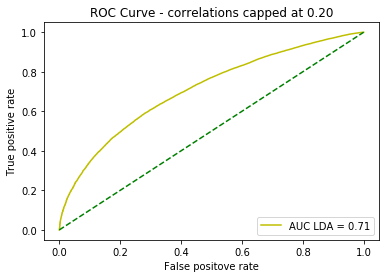

Text(0.5, 1, 'Confusion matrix - LDA')

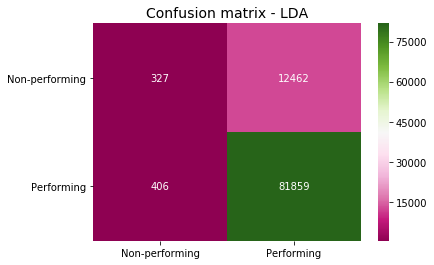

In [388]:
plt.plot(false_positive_rate, recall, 'y', label = 'AUC %s = %0.2f' % ('LDA', roc_auc))
plt.plot([0,1], [0,1], 'g--')
plt.legend(loc = 'lower right')
plt.ylabel('True positive rate')
plt.xlabel('False positove rate')
plt.title('ROC Curve - correlations capped at 0.20')
plt.show()


cm = confusion_matrix(y_20_test, y_20_pred)
cm1 = sns.heatmap(cm, fmt='d', annot=True, xticklabels=['Non-performing', 'Performing'],
                  yticklabels=['Non-performing', 'Performing'], cmap="PiYG")
cm1.set_yticklabels(cm1.get_yticklabels(), rotation=0, fontsize=10)
cm1.set_title("Confusion matrix - LDA", fontsize=14)




Removing highly correlated variables do not necessary improve the explanatory power.  NO data out.  Ends.

In [ ]:
# ENDS # ENDS # ENDS
#########################################################################################
# ENDS ####### (c) Peter Went, 2019
#########################################################################################